<a href="https://colab.research.google.com/github/LifeOfPie95/ENVS66601/blob/main/ENVS666_sensor_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sensor_10.csv',sep=';')
df

,Date & Time,Signal Strength,Temperature,Humidity,PM1.0,PM2.5,PM10
0,2022-02-18 11:45:00,-77.133333,25.500000,33.292667,1.866667,3.733333,4.200000
1,2022-02-18 17:30:00,-63.892857,22.875000,38.712857,0.571429,1.714286,2.357143
2,2022-02-18 17:45:00,-64.567568,23.278378,36.135135,0.743243,2.378378,3.310811
3,2022-02-18 18:00:00,-64.452055,23.512329,37.985890,0.671233,2.054795,3.068493
4,2022-02-18 18:15:00,-64.486486,24.164865,39.573919,0.716216,2.364865,3.527027
...,...,...,...,...,...,...,...
2119,2022-03-19 08:45:00,-56.081081,23.218919,42.401351,6.391892,10.243243,10.878378
2120,2022-03-19 09:00:00,-56.162162,23.364865,42.081081,6.094595,9.716216,10.391892
2121,2022-03-19 09:15:00,-57.108108,24.167568,42.591892,5.500000,8.783784,9.513514
2122,2022-03-19 09:30:00,-56.849315,23.982192,43.221918,4.958904,7.972603,8.808219


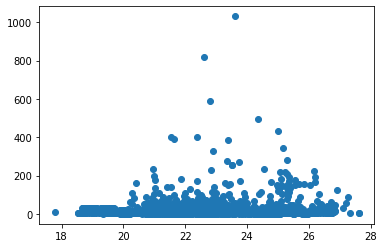

In [ ]:
dates = df['Date & Time']
dates = pd.DatetimeIndex(dates)

temperature = df['Temperature'].array
pm2p5 = df['PM2.5']
pm10 = df['PM10']

plt.scatter(temperature,pm2p5)

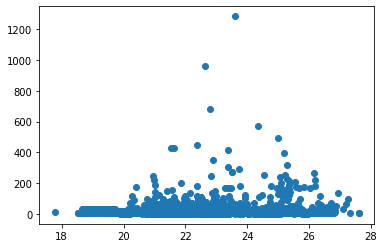

In [ ]:
plt.scatter(temperature,pm10)

In [ ]:
mean_pm2p5 = np.nanmean(pm2p5)
print(mean_pm2p5)
#calculate the std
std_pm2p5 = np.nanstd(pm2p5)
print(std_pm2p5)

21.343963802871308
49.30625777082355


Text(0.5, 1.0, 'freq vs. PM2.5 concentration')

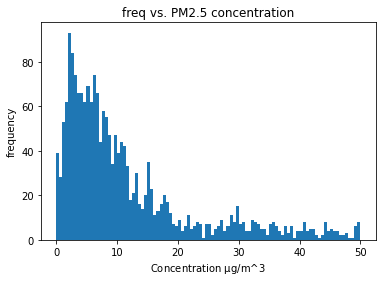

In [ ]:
counts, bins, bars = plt.hist(pm2p5,bins=100,range=[0,50]) #here we can set the number of bins and the ranges 
plt.ylabel('frequency')
plt.xlabel('Concentration µg/m^$3$')
plt.title('freq vs. PM2.5 concentration')

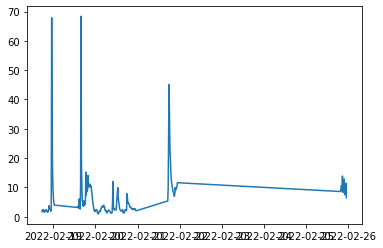

In [ ]:
plt.plot(dates[1:200],pm2p5[1:200])

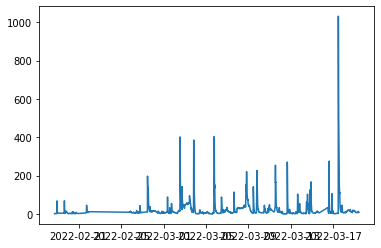

In [ ]:
plt.plot(dates[1:8000],pm2p5[1:8000])

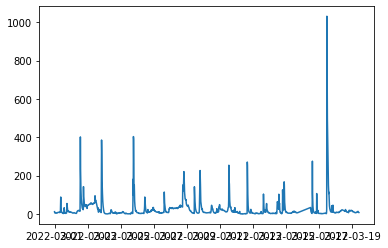

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('sensor_10.csv',sep=';')
df
#this will find in the time where all months are January
dates.month==3
#how seperate from data 
march_pm2p5 = pm2p5[dates.month==3]
march_dates = dates[dates.month==3]

plt.plot(march_dates,march_pm2p5)

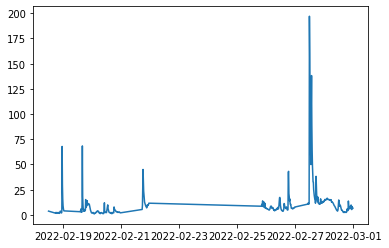

In [ ]:
#this will find in the time where all months are January
dates.month==3
#how seperate from data 
feb_pm2p5 = pm2p5[dates.month==2]
feb_dates = dates[dates.month==2]

plt.plot(feb_dates,feb_pm2p5)

25.63136982914401


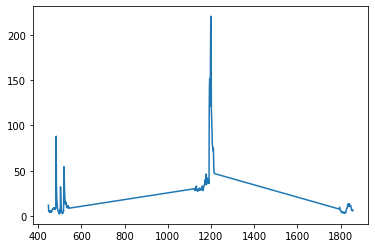

In [ ]:
monday_march_pm2p5 = pm2p5[np.logical_and(dates.month==3,dates.day_of_week==1)]
plt.plot(monday_march_pm2p5)
ave = np.nanmean(monday_march_pm2p5)
print(ave)

25.63136982914401


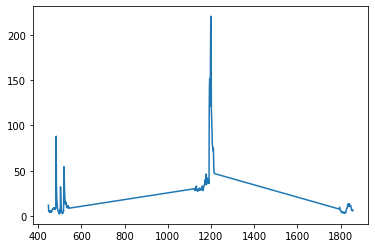

In [ ]:
sunday_march_pm2p5 = pm2p5[np.logical_and(dates.month==3,dates.day_of_week==1)]
plt.plot(sunday_march_pm2p5)
ave = np.nanmean(sunday_march_pm2p5)
print(ave)

14.623680987291289
26.187208877059074


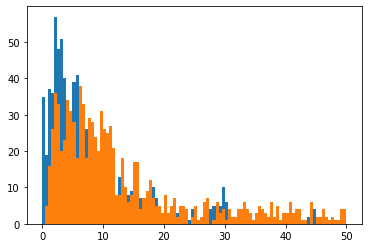

In [ ]:
ave_morn = np.nanmean(pm2p5[dates.hour < 12])
ave_aft = np.nanmean(pm2p5[dates.hour > 12])

print(ave_morn)
print(ave_aft)

counts, bins, bars = plt.hist(pm2p5[dates.hour < 12],bins=100,range=[0,50])
counts, bins, bars = plt.hist(pm2p5[dates.hour > 12],bins=100,range=[0,50])

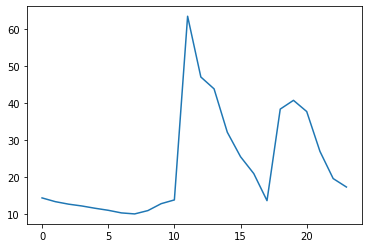

In [ ]:
#calculate pollutants through hours of the day 
ave_pm10_hours = np.zeros([24,])
for i in range(0,24):
  ave_pm10_hours[i] = np.nanmean(pm10[dates.hour == i])
plt.plot(ave_pm10_hours)

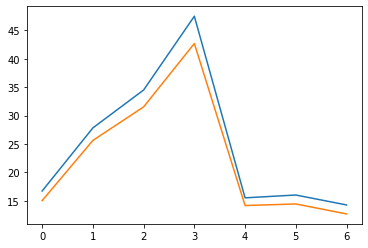

In [ ]:
#calculate levels at days of the week
ave_pm10_days = np.zeros([7,])
ave_pm2p5_days = np.zeros([7,])

for i in range(0,7):
  ave_pm10_days[i] = np.nanmean(pm10[dates.day_of_week==i])    
  ave_pm2p5_days[i] = np.nanmean(pm2p5[dates.day_of_week==i])

plt.plot(ave_pm10_days)
plt.plot(ave_pm2p5_days)